In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import pearsonr
import seaborn as sns
from matplotlib import font_manager, rc
import statsmodels.api as sm
from scipy.stats import spearmanr
import networkx as nx

In [28]:
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 파일 경로를 지정합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [29]:
df = pd.read_csv("corporation_data.csv")

In [30]:
df['IT_dummy'] = (df['산업구분명_분류']== 'IT')

In [31]:
df.head(10)

,누적투자유치금액,기업추천수,지역명,투자일자,투자단계명,투자금액,기업가치금액,앱스토어 등록,구글플레이 등록,설립일자_분류,기술스택_개수,산업구분명_분류,IT_dummy
0,2.000000e+07,0,수도권,20100101,투자 단계 비공개,2.000000e+07,NaN,0,1,2017년 이전,1,IT,True
1,5.028000e+10,71,수도권,20190615,Series B,1.250000e+10,NaN,1,1,2017년 이전,94,IT,True
2,2.000000e+08,0,수도권,20190101,투자 단계 비공개,NaN,NaN,0,0,2017년 이전,22,IT,True
3,2.300000e+08,1,수도권,20211201,Angel,2.300000e+08,2.000000e+08,0,0,2017년 이후,1,None IT,False
4,1.200000e+09,2,수도권,20201201,Series A,1.200000e+09,5.700000e+09,0,0,2017년 이전,2,IT,True
5,1.000000e+09,2,수도권,20100101,투자 단계 비공개,1.000000e+09,NaN,0,1,2017년 이전,1,IT,True
6,6.000000e+07,1,수도권,20160704,투자 단계 비공개,6.000000e+07,NaN,0,0,2017년 이후,1,IT,True
7,7.500000e+09,11,수도권,20190821,투자 단계 비공개,NaN,8.031425e+09,1,1,2017년 이후,7,None IT,False
8,1.000000e+09,6,수도권,20200102,투자 단계 비공개,NaN,NaN,0,0,2017년 이후,11,IT,True
9,2.325000e+09,28,수도권,20211029,Series A,2.000000e+09,NaN,0,0,2017년 이후,32,IT,True


In [7]:
df.drop(columns=['산업구분명_분류'], inplace=True)

In [32]:
df['founded_dummy'] = (df['설립일자_분류']== '2017년 이후')

In [33]:
df.drop(columns=['설립일자_분류'], inplace=True)

In [34]:
df.head(10)

,누적투자유치금액,기업추천수,지역명,투자일자,투자단계명,투자금액,기업가치금액,앱스토어 등록,구글플레이 등록,기술스택_개수,산업구분명_분류,IT_dummy,founded_dummy
0,2.000000e+07,0,수도권,20100101,투자 단계 비공개,2.000000e+07,NaN,0,1,1,IT,True,False
1,5.028000e+10,71,수도권,20190615,Series B,1.250000e+10,NaN,1,1,94,IT,True,False
2,2.000000e+08,0,수도권,20190101,투자 단계 비공개,NaN,NaN,0,0,22,IT,True,False
3,2.300000e+08,1,수도권,20211201,Angel,2.300000e+08,2.000000e+08,0,0,1,None IT,False,True
4,1.200000e+09,2,수도권,20201201,Series A,1.200000e+09,5.700000e+09,0,0,2,IT,True,False
5,1.000000e+09,2,수도권,20100101,투자 단계 비공개,1.000000e+09,NaN,0,1,1,IT,True,False
6,6.000000e+07,1,수도권,20160704,투자 단계 비공개,6.000000e+07,NaN,0,0,1,IT,True,True
7,7.500000e+09,11,수도권,20190821,투자 단계 비공개,NaN,8.031425e+09,1,1,7,None IT,False,True
8,1.000000e+09,6,수도권,20200102,투자 단계 비공개,NaN,NaN,0,0,11,IT,True,True
9,2.325000e+09,28,수도권,20211029,Series A,2.000000e+09,NaN,0,0,32,IT,True,True


In [35]:
df['Location_dummy'] = (df['지역명']== '수도권')

In [36]:
df.drop(columns=['지역명'], inplace=True)

In [13]:
df.head(10)

,기업일련번호,기업한줄소개내용,누적투자유치금액,기업추천수,제품국문명,한줄소개내용,투자일자,투자단계명,투자금액,기업가치금액,앱스토어 등록,구글플레이 등록,기술스택_개수,IT_dummy,founded_dummy,Location_dummy
0,94400,플로브(Floev)는 나에게 가장 잘 어울리는 안경을 찾을 수 있도록 개인 맞춤형 ...,5271.616163,1,플로브,나에게 가장 잘 어울리는 안경을 찾을 수 있도록 개인 맞춤형 큐레이션을 해주는 온오...,20181129,Angel,2396.568301,12739.817115,0,0,29,False,True,True
1,92657,외국인관광객을 위한 가치있는 이동과 여행 서비스 플랫폼,5271.616163,1,에어셔틀,편하게 공항을 오가다,20171031,투자 단계 비공개,2396.568301,12739.817115,1,1,10,True,False,True
2,73,Web/Mobile App/Mobile Web의 신규 서비스 기획 및 개발|| 신...,20.000000,0,모메친,NaN,20100101,투자 단계 비공개,20.000000,12739.817115,0,1,1,True,False,True
3,17492,숨고와 위대한 여정을 같이 할 당신을 기다립니다.,50280.000000,71,숨고,숨고는 사람과 사람 사이의 진정성 있는 연결로 우리의 생활을 향상시킵니다.,20190615,Series B,12500.000000,12739.817115,1,1,94,True,False,True
4,147580,인공지능 자연어처리 기술을 이용한 헬스케어 마케팅 솔루션을 개발합니다.,200.000000,0,닥터송,개발자|| 디자이너|| 전문 마케터|| 경영 컨설턴트들이 힘을 합쳐 지금까지 없었던...,20190101,투자 단계 비공개,2396.568301,12739.817115,0,0,22,True,False,True
5,160956,NO.1 친환경 식품 플랫폼,230.000000,1,원픽마켓,가치 소비의 기준|| 원픽마켓,20211201,Angel,230.000000,200.000000,0,0,1,False,True,True
6,32276,WEB|| APP 의료 핀테크 솔루션 전문 기업,1200.000000,2,마이써티 마이트리,의료증명서 통합 발급 및 전송 플랫폼,20201201,Series A,1200.000000,5700.000000,0,0,2,True,False,True
7,27,펠리컨 폴과 내가그린 기린그림 등의 모바일게임을 개발하고 서비스하는 회사,1000.000000,2,펠리컨 폴,NaN,20100101,투자 단계 비공개,1000.000000,12739.817115,0,1,1,True,False,True
8,161009,인공지능 기반의 바이어발굴 서비스로 기업들의 해외 판로 개척을 지원,5271.616163,1,딥세일즈,신규 바이어 발굴 서비스,20211108,Seed,2396.568301,12739.817115,0,0,15,True,True,True
9,157709,유아동반객 나들이꿀팁 플랫폼 <엄마의지도>,5271.616163,1,엄마의지도,유아동반객 나들이꿀팁 플랫폼 <엄마의지도>,20210524,투자 단계 비공개,2396.568301,12739.817115,0,0,1,True,True,True


In [64]:
df.isnull().sum()

누적투자유치금액             0
기업추천수                0
투자단계명                0
투자금액                 0
앱스토어 등록              0
구글플레이 등록             0
기술스택_개수              0
산업구분명_분류             0
IT기업 여부              0
2017년 이후 설립 여부       0
수도권 여부               0
투자성공여부               0
누적투자유치금액_투자금액_차이     0
투자단계명_레이블            0
투자단계명_숫자            48
dtype: int64

In [43]:
instance_count = df.shape[0]

print("인스턴스 개수:", instance_count)

인스턴스 개수: 1309


In [40]:
df.drop(columns=['기업가치금액'], inplace=True)

In [38]:
mean_value = df['투자금액'].mean()
df['투자금액'].fillna(mean_value, inplace=True)

In [44]:
df.head()

,누적투자유치금액,기업추천수,투자일자,투자단계명,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,산업구분명_분류,IT_dummy,founded_dummy,Location_dummy
0,2.000000e+07,0,20100101,투자 단계 비공개,2.000000e+07,0,1,1,IT,True,False,True
1,5.028000e+10,71,20190615,Series B,1.250000e+10,1,1,94,IT,True,False,True
2,2.000000e+08,0,20190101,투자 단계 비공개,2.396568e+09,0,0,22,IT,True,False,True
3,2.300000e+08,1,20211201,Angel,2.300000e+08,0,0,1,None IT,False,True,True
4,1.200000e+09,2,20201201,Series A,1.200000e+09,0,0,2,IT,True,False,True


In [45]:
df['투자성공여부'] = df['투자일자'].apply(lambda x: 1 if x >= 20170101 else 0)

In [47]:
df.drop(columns=['투자일자'], inplace=True)

In [48]:
df.head(10)

,누적투자유치금액,기업추천수,투자단계명,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,산업구분명_분류,IT_dummy,founded_dummy,Location_dummy,투자성공여부
0,2.000000e+07,0,투자 단계 비공개,2.000000e+07,0,1,1,IT,True,False,True,0
1,5.028000e+10,71,Series B,1.250000e+10,1,1,94,IT,True,False,True,1
2,2.000000e+08,0,투자 단계 비공개,2.396568e+09,0,0,22,IT,True,False,True,1
3,2.300000e+08,1,Angel,2.300000e+08,0,0,1,None IT,False,True,True,1
4,1.200000e+09,2,Series A,1.200000e+09,0,0,2,IT,True,False,True,1
5,1.000000e+09,2,투자 단계 비공개,1.000000e+09,0,1,1,IT,True,False,True,0
6,6.000000e+07,1,투자 단계 비공개,6.000000e+07,0,0,1,IT,True,True,True,0
7,7.500000e+09,11,투자 단계 비공개,2.396568e+09,1,1,7,None IT,False,True,True,1
8,1.000000e+09,6,투자 단계 비공개,2.396568e+09,0,0,11,IT,True,True,True,1
9,2.325000e+09,28,Series A,2.000000e+09,0,0,32,IT,True,True,True,1


In [49]:
new_columns = {
    'IT_dummy': 'IT기업 여부',
    'founded_dummy': '2017년 이후 설립 여부',
    'Location_dummy': '수도권 여부'
}
df.rename(columns=new_columns, inplace=True)

In [51]:
df['IT기업 여부'] = df['IT기업 여부'].astype(int)
df['2017년 이후 설립 여부'] = df['2017년 이후 설립 여부'].astype(int)
df['수도권 여부'] = df['수도권 여부'].astype(int)


In [53]:
df['누적투자유치금액_투자금액_차이'] = df['누적투자유치금액'] - df['투자금액']

In [54]:
df.head()

,누적투자유치금액,기업추천수,투자단계명,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,산업구분명_분류,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이
0,2.000000e+07,0,투자 단계 비공개,2.000000e+07,0,1,1,IT,1,0,1,0,0.000000e+00
1,5.028000e+10,71,Series B,1.250000e+10,1,1,94,IT,1,0,1,1,3.778000e+10
2,2.000000e+08,0,투자 단계 비공개,2.396568e+09,0,0,22,IT,1,0,1,1,-2.196568e+09
3,2.300000e+08,1,Angel,2.300000e+08,0,0,1,None IT,0,1,1,1,0.000000e+00
4,1.200000e+09,2,Series A,1.200000e+09,0,0,2,IT,1,0,1,1,0.000000e+00


In [55]:
# E 표기법을 없애고 정수 형태로 출력
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 데이터프레임 출력
df.head()

,누적투자유치금액,기업추천수,투자단계명,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,산업구분명_분류,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이
0,20000000.00,0,투자 단계 비공개,20000000.00,0,1,1,IT,1,0,1,0,0.00
1,50280000000.00,71,Series B,12500000000.00,1,1,94,IT,1,0,1,1,37780000000.00
2,200000000.00,0,투자 단계 비공개,2396568300.88,0,0,22,IT,1,0,1,1,-2196568300.88
3,230000000.00,1,Angel,230000000.00,0,0,1,None IT,0,1,1,1,0.00
4,1200000000.00,2,Series A,1200000000.00,0,0,2,IT,1,0,1,1,0.00


In [76]:
df.drop(columns=['투자단계명_숫자'], inplace=True)

In [77]:
df['투자단계명'].unique()

array(['투자 단계 비공개', 'Series B', 'Angel', 'Series A', 'Seed', '해당없음',
       'Pre-IPO', 'Series C', 'Series D'], dtype=object)

In [88]:
df['투자단계명'] = df['투자단계명'].fillna('해당없음')

In [91]:
invest_stage_mapping = {
    '투자 단계 비공개': 1,
    '해당없음' : 1,
    'Angel': 2,
    'Seed': 3,
    'Series A': 4,
    'Series B': 5,
    'Series C': 6,
    'Series D': 7,
    'Pre-IPO': 8
}

# '투자단계명' 열을 새로운 값으로 변환
df['투자단계명_숫자'] = df['투자단계명'].map(invest_stage_mapping)


In [92]:
df.isnull().sum()

누적투자유치금액            0
기업추천수               0
투자단계명               0
투자금액                0
앱스토어 등록             0
구글플레이 등록            0
기술스택_개수             0
산업구분명_분류            0
IT기업 여부             0
2017년 이후 설립 여부      0
수도권 여부              0
투자성공여부              0
누적투자유치금액_투자금액_차이    0
투자단계명_레이블           0
투자단계명_숫자            0
dtype: int64

In [93]:
df.head()

,누적투자유치금액,기업추천수,투자단계명,투자금액,앱스토어 등록,구글플레이 등록,기술스택_개수,산업구분명_분류,IT기업 여부,2017년 이후 설립 여부,수도권 여부,투자성공여부,누적투자유치금액_투자금액_차이,투자단계명_레이블,투자단계명_숫자
0,20000000.00,0,투자 단계 비공개,20000000.00,0,1,1,IT,1,0,1,0,0.00,7,1
1,50280000000.00,71,Series B,12500000000.00,1,1,94,IT,1,0,1,1,37780000000.00,4,5
2,200000000.00,0,투자 단계 비공개,2396568300.88,0,0,22,IT,1,0,1,1,-2196568300.88,7,1
3,230000000.00,1,Angel,230000000.00,0,0,1,None IT,0,1,1,1,0.00,0,2
4,1200000000.00,2,Series A,1200000000.00,0,0,2,IT,1,0,1,1,0.00,3,4


In [94]:
df.drop(columns=['투자단계명_레이블'], inplace=True)

In [95]:
df.to_csv("corporation_final_data.csv", index=False)

## 상관분석

### 누적 투자 유치 금액과 기업 추천 수 간의 상관 분석

##### 높은 누적 투자 유치 금액이 기업 추천 수와 어떤 관련이 있는지 분석

In [7]:
correlation_recommended_investment = pearsonr(df['누적투자유치금액'], df['기업추천수'])

In [8]:
print(correlation_recommended_investment)

PearsonRResult(statistic=0.14015957676035853, pvalue=6.692256721935587e-11)


### 투자 금액과 기업 가치 금액 간의 상관 분석

##### 투자자들이 기업 가치를 어떻게 평가하고 투자를 결정하는지 이해

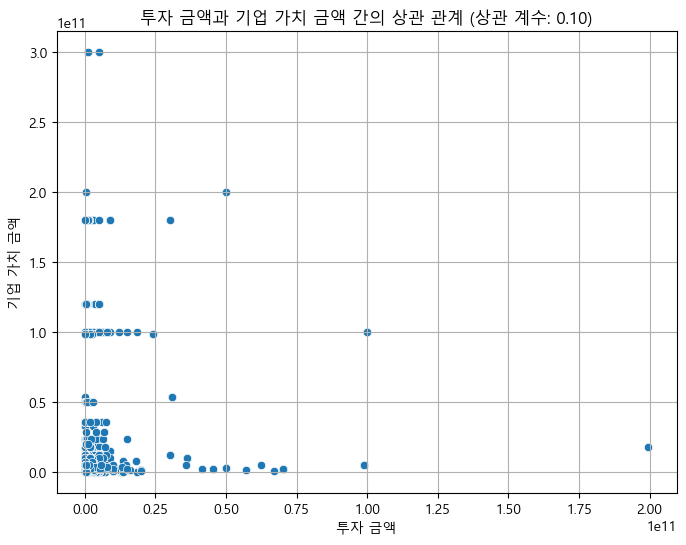

In [9]:
correlation = df['투자금액'].corr(df['기업가치금액'])

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='투자금액', y='기업가치금액', data=df)
plt.title(f'투자 금액과 기업 가치 금액 간의 상관 관계 (상관 계수: {correlation:.2f})')
plt.xlabel('투자 금액')
plt.ylabel('기업 가치 금액')
plt.grid(True)
plt.show()

In [11]:
df.head()

,누적투자유치금액,기업추천수,지역명,투자일자,투자단계명,투자금액,기업가치금액,앱스토어 등록,구글플레이 등록,설립일자_분류,기술스택_개수,산업구분명_분류,IT_dummy
0,2.000000e+07,1,수도권,20181129,Angel,2.000000e+07,200000000.0,0,0,2017년 이후,29,None IT,False
1,2.000000e+07,1,수도권,20171031,투자 단계 비공개,2.000000e+07,200000000.0,1,1,2017년 이전,10,IT,True
2,2.000000e+07,0,수도권,20100101,투자 단계 비공개,2.000000e+07,200000000.0,0,1,2017년 이전,1,IT,True
3,5.028000e+10,71,수도권,20190615,Series B,1.250000e+10,200000000.0,1,1,2017년 이전,94,IT,True
4,2.000000e+08,0,수도권,20190101,투자 단계 비공개,2.300000e+08,200000000.0,0,0,2017년 이전,22,IT,True


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   누적투자유치금액  2150 non-null   float64
 1   기업추천수     2150 non-null   int64  
 2   지역명       2150 non-null   object 
 3   투자일자      2150 non-null   int64  
 4   투자단계명     2150 non-null   object 
 5   투자금액      2150 non-null   float64
 6   기업가치금액    2135 non-null   float64
 7   앱스토어 등록   2150 non-null   int64  
 8   구글플레이 등록  2150 non-null   int64  
 9   설립일자_분류   2150 non-null   object 
 10  기술스택_개수   2150 non-null   int64  
 11  산업구분명_분류  2150 non-null   object 
 12  IT_dummy  2150 non-null   bool   
dtypes: bool(1), float64(3), int64(5), object(4)
memory usage: 203.8+ KB
None


In [18]:
df_copy = df

In [23]:
df['2017년 이후 투자성공여부'] = df['투자일자'].apply(lambda x: 1 if x >= 20170101 else 0)

In [24]:
df.head()

,누적투자유치금액,기업추천수,지역명,투자일자,투자단계명,투자금액,기업가치금액,앱스토어 등록,구글플레이 등록,설립일자_분류,기술스택_개수,산업구분명_분류,IT_dummy,투자성공여부,2017년 이후 투자성공여부
0,2.000000e+07,1,수도권,20181129,Angel,2.000000e+07,200000000.0,0,0,2017년 이후,29,None IT,False,1,1
1,2.000000e+07,1,수도권,20171031,투자 단계 비공개,2.000000e+07,200000000.0,1,1,2017년 이전,10,IT,True,1,1
2,2.000000e+07,0,수도권,20100101,투자 단계 비공개,2.000000e+07,200000000.0,0,1,2017년 이전,1,IT,True,0,0
3,5.028000e+10,71,수도권,20190615,Series B,1.250000e+10,200000000.0,1,1,2017년 이전,94,IT,True,1,1
4,2.000000e+08,0,수도권,20190101,투자 단계 비공개,2.300000e+08,200000000.0,0,0,2017년 이전,22,IT,True,1,1


In [25]:
df.drop(columns=['산업구분명_분류'], inplace=True)
df.drop(columns=['투자일자'], inplace=True)
df.drop(columns=['투자성공여부'], inplace=True)

In [26]:
df.head()

,누적투자유치금액,기업추천수,지역명,투자단계명,투자금액,기업가치금액,앱스토어 등록,구글플레이 등록,설립일자_분류,기술스택_개수,IT_dummy,2017년 이후 투자성공여부
0,2.000000e+07,1,수도권,Angel,2.000000e+07,200000000.0,0,0,2017년 이후,29,False,1
1,2.000000e+07,1,수도권,투자 단계 비공개,2.000000e+07,200000000.0,1,1,2017년 이전,10,True,1
2,2.000000e+07,0,수도권,투자 단계 비공개,2.000000e+07,200000000.0,0,1,2017년 이전,1,True,0
3,5.028000e+10,71,수도권,Series B,1.250000e+10,200000000.0,1,1,2017년 이전,94,True,1
4,2.000000e+08,0,수도권,투자 단계 비공개,2.300000e+08,200000000.0,0,0,2017년 이전,22,True,1


### 투자 일자와 투자 금액 간의 상관 분석

##### 특정 시기에 투자가 집중되는 경향이 있는지 조사

### 다중회귀분석

In [10]:
X = df[['기업가치금액', '기업추천수', '투자금액', '구글플레이 등록', '앱스토어 등록', '기술스택_개수']]
y = df['누적투자유치금액']

# 상수항(절편) 추가
X = sm.add_constant(X)

# 다중 선형 회귀 모델 학습
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())

MissingDataError: exog contains inf or nans

#### R-Squared를 통해 39%의 종속 변수 변동을 설명할 수 있고, F-statistic에서 228.6, 유의 수준에서 매우 작은 p-value를 가지므로 회귀 모델이 통계적으로 유의함.
#### 기업의 누적 투자 유치 금액에 영향을 미치는 주요 요인은 기업 추천 수, 투자 금액, 구글 플레이 등록 여부

## 비모수적 상관 분석

In [ ]:
corr, p_value = spearmanr(df['누적투자유치금액'], df['기업추천수'])
print("Spearman correlation coefficient:", corr)
print("P-value:", p_value)

In [28]:
corr, p_value = spearmanr(df['누적투자유치금액'], df['기업가치금액'])
print("Spearman correlation coefficient:", corr)
print("P-value:", p_value)

Spearman correlation coefficient: 0.2607199223839672
P-value: 9.599169872977692e-35


In [29]:
corr, p_value = spearmanr(df['누적투자유치금액'], df['구글플레이 등록'])
print("Spearman correlation coefficient:", corr)
print("P-value:", p_value)

Spearman correlation coefficient: 0.08660927443789525
P-value: 5.791986419117927e-05


In [30]:
corr, p_value = spearmanr(df['누적투자유치금액'], df['앱스토어 등록'])
print("Spearman correlation coefficient:", corr)
print("P-value:", p_value)

Spearman correlation coefficient: 0.09408315790278343
P-value: 1.2446600849074328e-05


## 토픽모델링

In [31]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

In [68]:
corpus = df['기업한줄소개내용']

In [71]:
stoplist = set('for a of the and to in'.split())
texts = [
    [word.lower() for word in str(document).split() if word.lower() not in stoplist]
    for document in corpus
]

In [74]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [75]:
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [76]:
pprint(lda_model.print_topics())

[(0,
  '0.019*"서비스" + 0.017*"플랫폼" + 0.014*"nan" + 0.013*"기업" + 0.008*"개발" + '
  '0.008*"및" + 0.008*"기반" + 0.008*"위한" + 0.007*"전문" + 0.007*"모바일"'),
 (1,
  '0.013*"있습니다." + 0.009*"있는" + 0.007*"서비스" + 0.007*"수" + 0.006*"스타트업" + '
  '0.005*"모바일" + 0.005*"만들고" + 0.005*"있도록" + 0.004*"서비스를" + 0.004*"플랫폼"'),
 (2,
  '0.013*"플랫폼" + 0.008*"위한" + 0.008*"있습니다." + 0.006*"모바일" + 0.006*"및" + '
  '0.005*"서비스" + 0.004*"만드는" + 0.004*"기반" + 0.004*"플랫폼을" + 0.004*"기업입니다."')]


## 단어 빈도 분석

In [77]:
from collections import Counter

In [85]:
df = df.dropna(subset=['기업한줄소개내용'])

In [86]:
words = df['기업한줄소개내용'].apply(lambda x: x.lower().split())

In [87]:
all_words = [word for sublist in words for word in sublist]

In [88]:
word_freq = Counter(all_words)

In [90]:
top_words = word_freq.most_common(5)

In [91]:
print("가장 빈번하게 등장하는 단어:")
for word, freq in top_words:
    print(f"{word}: {freq}회")

가장 빈번하게 등장하는 단어:
플랫폼: 304회
서비스: 261회
있습니다.: 154회
및: 146회
위한: 134회


In [121]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# 텍스트에서 유의미한 토큰 추출 함수 정의
def extract_meaningful_tokens(text):
    # 텍스트를 토큰화하여 단어와 품사로 분리
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    
    # 명사와 형용사만 선택하여 추출
    meaningful_tokens = [word for word, pos in tagged_tokens if pos.startswith('NN') or pos.startswith('JJ')]
    
    return meaningful_tokens

# 유의미한 토큰 추출 및 결과 출력
for i, text in enumerate(text_strings):
    meaningful_tokens = extract_meaningful_tokens(text)
    print(f"텍스트 {i+1}에서 유의미한 토큰: {meaningful_tokens}")

텍스트 1에서 유의미한 토큰: ['플로브', 'Floev', '나에게', '가장', '잘', '어울리는', '안경을', '찾을', '수', '있도록', '개인', '맞춤형', '큐레이션을', '해', '주는', '온오프라인', '통합', '안경', '큐레이션', '플랫폼', '서비스입니다']
텍스트 2에서 유의미한 토큰: ['외국인관광객을', '위한', '가치있는', '이동과', '여행', '서비스', '플랫폼']
텍스트 3에서 유의미한 토큰: ['Web/Mobile', 'App/Mobile', 'Web의', '신규', '서비스', '기획', '및', '개발||', '신규', '비지니스', '모델', '개발']
텍스트 4에서 유의미한 토큰: ['숨고와', '위대한', '여정을', '같이', '할', '당신을', '기다립니다']
텍스트 5에서 유의미한 토큰: ['인공지능', '자연어처리', '기술을', '이용한', '헬스케어', '마케팅', '솔루션을', '개발합니다']
텍스트 6에서 유의미한 토큰: ['NO.1', '친환경', '식품', '플랫폼']
텍스트 7에서 유의미한 토큰: ['WEB||', 'APP', '의료', '핀테크', '솔루션', '전문', '기업']
텍스트 8에서 유의미한 토큰: ['펠리컨', '폴과', '내가그린', '기린그림', '등의', '모바일게임을', '개발하고', '서비스하는', '회사']
텍스트 9에서 유의미한 토큰: ['인공지능', '기반의', '바이어발굴', '서비스로', '기업들의', '해외', '판로', '개척을', '지원']
텍스트 10에서 유의미한 토큰: ['유아동반객', '나들이꿀팁', '플랫폼', '<', '엄마의지도', '>']
텍스트 11에서 유의미한 토큰: ['우리는', '공유하고자', '한다', '학원버스를']
텍스트 12에서 유의미한 토큰: ['SWING은', '사람을', '위한', '도시를', '만들기', '위한', '모빌리티', '회사입니다']
텍스트 13에서 유의미한 토큰: ['글로벌', '지식', '공